In [78]:
import os
import torch
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

def load_model_weights(model_path):
    """Load model weights from a .pth file."""
    checkpoint = torch.load(model_path, map_location=torch.device("cpu"))
    model_state = checkpoint["student_model_state_dict"]
    return {k: v.cpu().numpy() for k, v in model_state.items() if "weight" in k}

def create_heatmaps(weights_dict, model_name="Model Weights", use_plotly=False):
    num_layers = len(weights_dict)

    if use_plotly: # Interactive Plotly visualization
        fig = make_subplots(rows=1, cols=num_layers, subplot_titles=[f"Layer {i+1}" for i in range(num_layers)])
        global_min = min(w.min() for w in weights_dict.values())
        global_max = max(w.max() for w in weights_dict.values())

        # for i, (layer_name, weights) in enumerate(weights_dict.items()):
        #     heatmap = go.Heatmap(z=weights, colorscale="RdBu", zmin=global_min, zmax=global_max)
        #     fig.add_trace(heatmap, row=1, col=i+1)

        colorscale = [
            [-2, "red"],    # Minimum value (negative)
            [0, "white"],  # Zero value
            [2, "blue"]   # Maximum value (positive)
        ]
    
        for i, (layer_name, weights) in enumerate(weights_dict.items()):
            heatmap = go.Heatmap(
                z=weights, 
                colorscale=colorscale,  # Custom scale
                zmid=0,  # Ensure 0 is mapped to white
                zmin=weights.min(), 
                zmax=weights.max()
        )
        fig.add_trace(heatmap, row=1, col=i+1)
        fig.add_trace(heatmap, row=1, col=i+1)

        fig.update_layout(title=f"{model_name} - Weight Heatmaps", height=500, width=250*num_layers)
        fig.show()

    else:  # Matplotlib visualization
        fig, axes = plt.subplots(1, num_layers, figsize=(4*num_layers, 4))
        if num_layers == 1:
            axes = [axes]

        for i, (layer_name, weights) in enumerate(weights_dict.items()):
            ax = axes[i]
            #cmap = LinearSegmentedColormap.from_list("custom_cmap", ["red", "white", "green"], N=500)
            cmap = plt.get_cmap("RdBu")
            im = ax.imshow(weights, cmap=cmap, aspect="auto", vmin=-2, vmax=2)
            shape_str = f"{weights.shape[0]}×{weights.shape[1]}"
            ax.set_title(f"{layer_name}\n{shape_str}", fontsize=10)
            # cols = weights.shape[1]
            # rows = weights.shape[0]
            # # ax.set_xlabel(cols)
            # # ax.set_ylabel(rows)

        fig.colorbar(im, ax=axes, fraction=0.02)
        #plt.suptitle(f"{model_name} - Weight Heatmaps")
        plt.show()

In [177]:
def create_heatmaps(weights_dict, model_name="Model Weights"):
    num_layers = len(weights_dict)

    # Bigger figure width to give heatmaps more space
    fig, axes = plt.subplots(num_layers, 1, figsize=(10, 1.5 * num_layers))
    if num_layers == 1:
        axes = [axes]

    im = None

    for i, (layer_name, weights) in enumerate(weights_dict.items()):
        ax = axes[i]
        rows, cols = weights.shape

        # Rotate if vertical
        if rows > cols:
            weights = weights.T
            rows, cols = weights.shape

        # Heatmap
        im = ax.imshow(weights, cmap="RdBu", aspect="equal", vmin=-2, vmax=2)

        # Clean, compact labels
        clean_name = f"Layer {int(layer_name.split('.')[1])+1}"
        ax.set_title(f"{clean_name} (dimension {rows}×{cols})", fontsize=11, pad=4)
        ax.invert_yaxis()
        if rows == 1:
            ax.set_yticks([])

    # Tightly pack subplots
    plt.subplots_adjust(left=0.06, right=0.86, top=0.94, bottom=0.06, hspace=0.05)

    # Add slim colorbar on the right
    cbar_ax = fig.add_axes([0.88, 0.15, 0.015, 0.7])
    fig.colorbar(im, cax=cbar_ax)

    # Title
    #plt.suptitle(f"{model_name} - Weight Heatmaps", fontsize=13, y=0.985)
    plt.show()

In [178]:
def create_all_heatmaps(directory):
    model_files = [f for f in os.listdir(directory) if f.endswith(".pth")]
    for model_file in model_files:
        model_path = os.path.join(directory, model_file)
        print(f"\nLoading weights from {model_file}...")
        
        weights_dict = load_model_weights(model_path)
        create_heatmaps(weights_dict, model_name=model_file)


Loading weights from nonoverlappingCNN_tanh__fcnn_decreasing_tanh.pth...


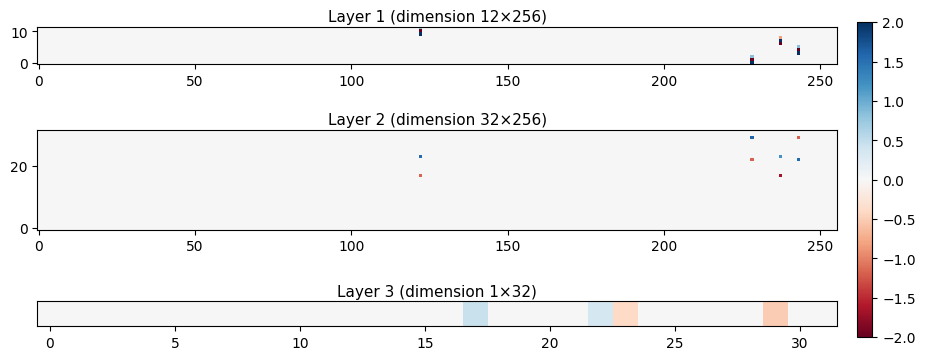


Loading weights from nonoverlappingCNN_relu__fcnn_decreasing_relu.pth...


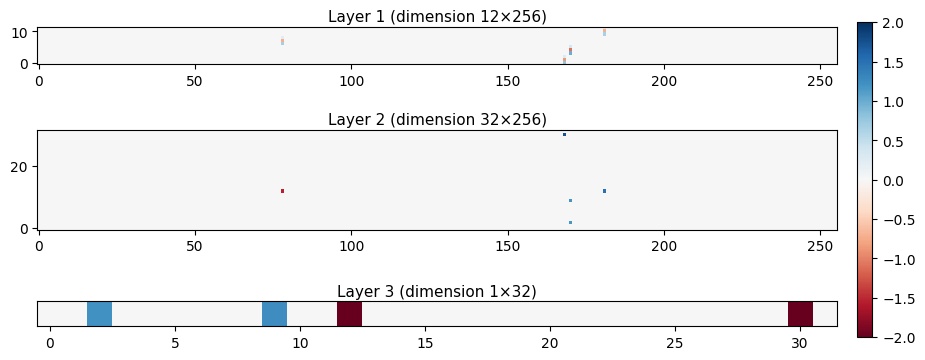


Loading weights from nonoverlappingCNN_sigmoid__fcnn_decreasing_sigmoid.pth...


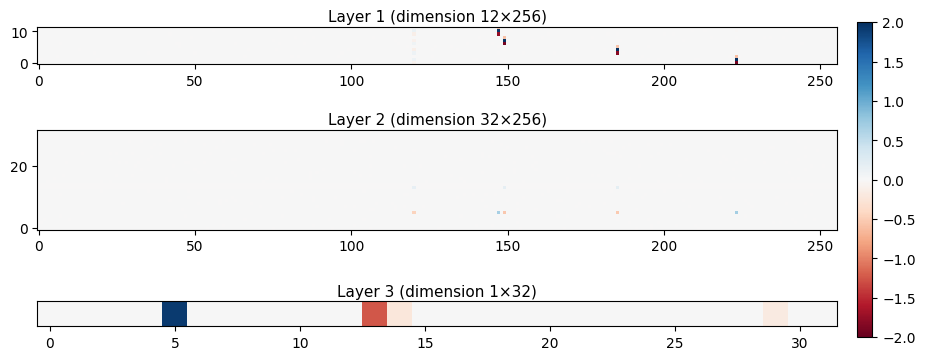

In [179]:
directory = "../experiment_output/Davide_MLP/experiments_22032025_t4096_b32_lr0.005_5e-6"
create_all_heatmaps(directory)


Loading weights from nonoverlappingCNN_tanh__fcnn_decreasing_tanh.pth...


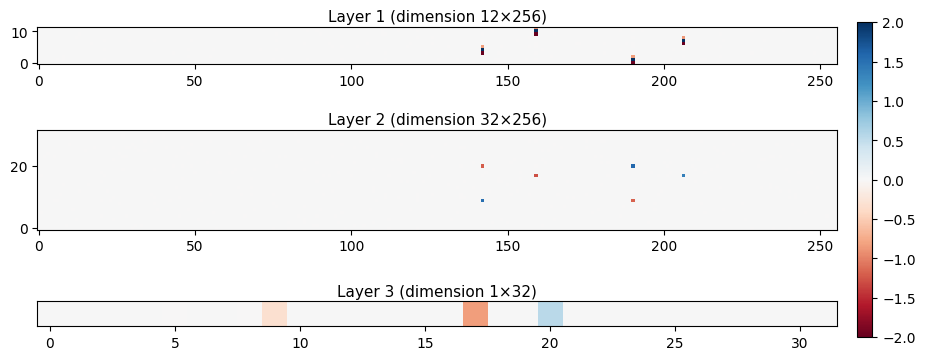


Loading weights from nonoverlappingCNN_relu__fcnn_decreasing_relu.pth...


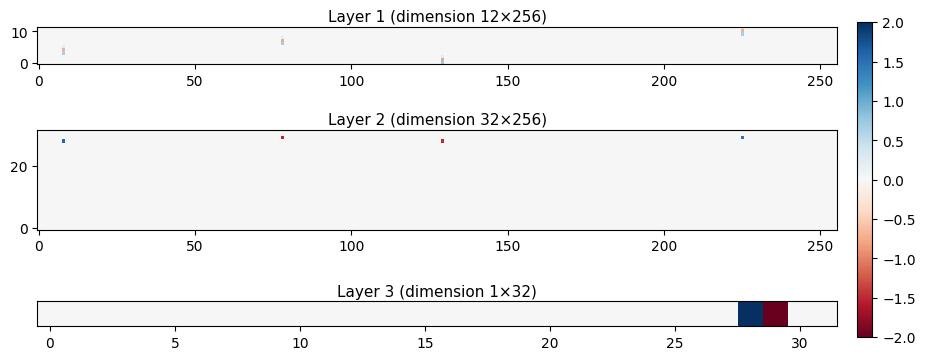


Loading weights from nonoverlappingCNN_sigmoid__fcnn_decreasing_sigmoid.pth...


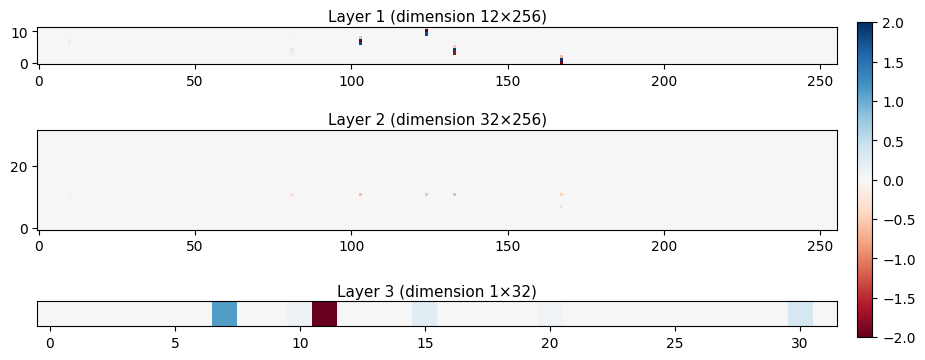

In [180]:
directory = "../experiment_output/Davide_MLP/experiments_23032025_256_lr0.005_l1_5e-6_t5120"
create_all_heatmaps(directory)


Loading weights from overlappingCNN_sigmoid__fcnn_decreasing_sigmoid.pth...


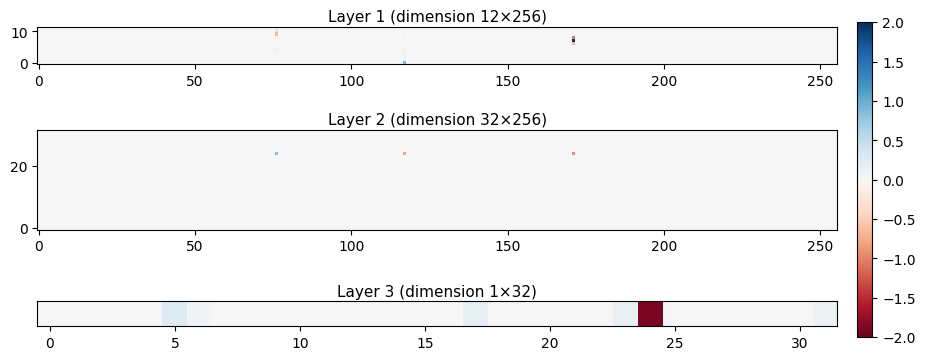


Loading weights from overlappingCNN_tanh__fcnn_decreasing_tanh.pth...


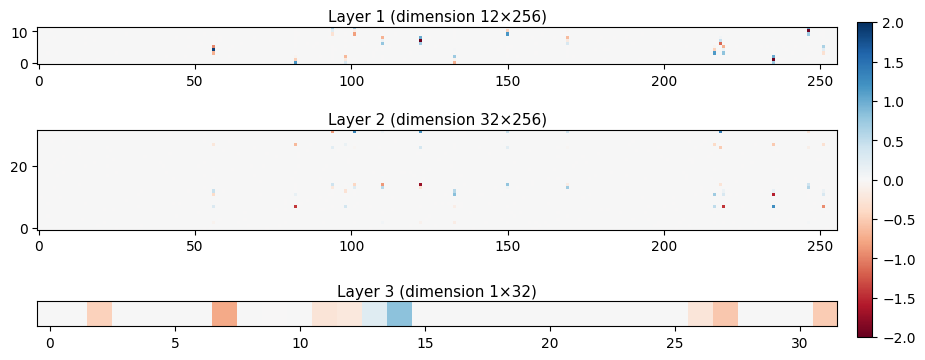


Loading weights from overlappingCNN_relu__fcnn_decreasing_relu.pth...


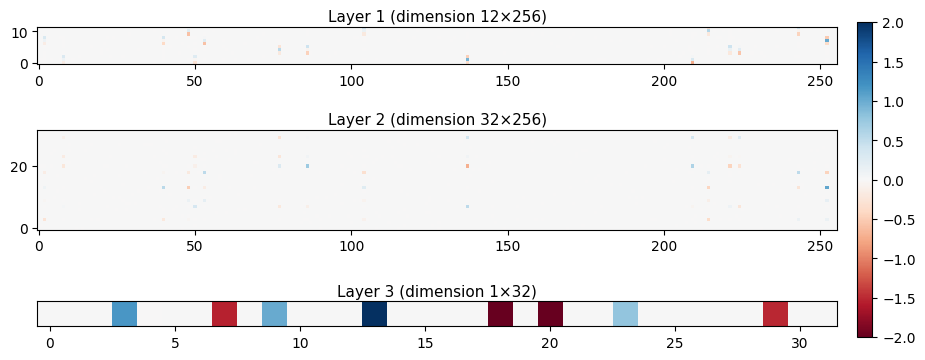

In [181]:
directory = "../experiment_output/overlappingTeacher/experiments_26032025_l1_5e-6"
create_all_heatmaps(directory)


Loading weights from overlappingCNN_sigmoid__fcnn_decreasing_sigmoid.pth...


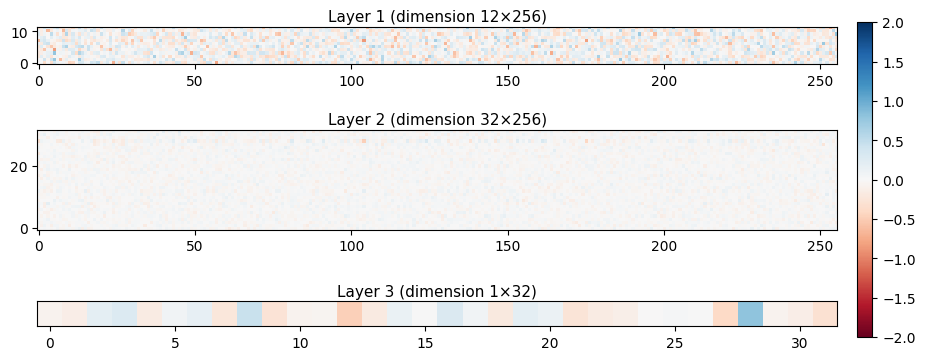


Loading weights from overlappingCNN_tanh__fcnn_decreasing_tanh.pth...


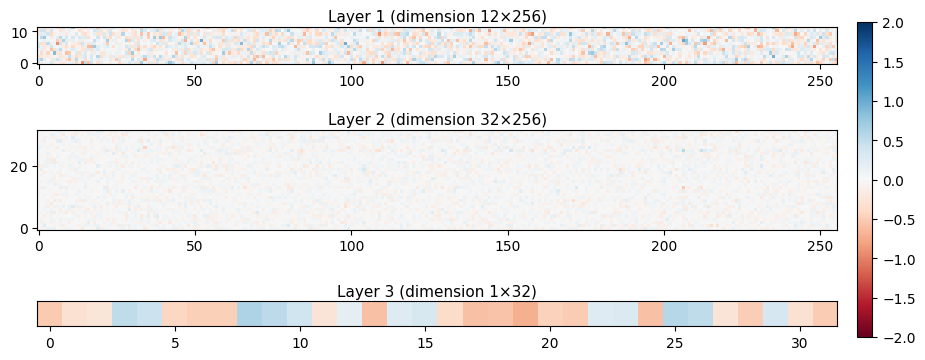


Loading weights from overlappingCNN_relu__fcnn_decreasing_relu.pth...


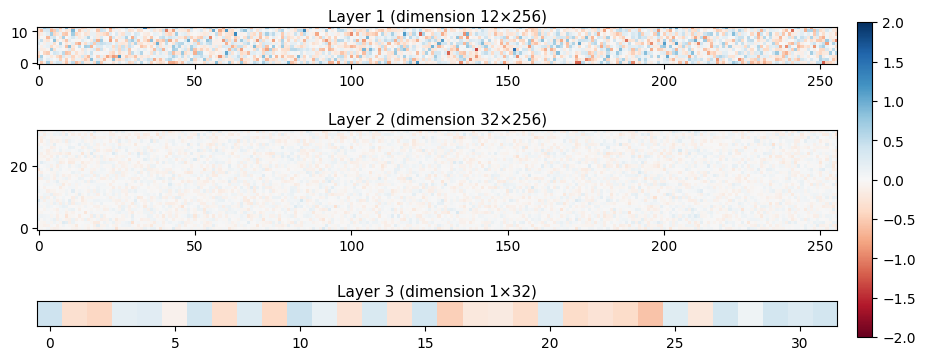

In [182]:
directory = "../experiment_output/overlappingTeacher/experiments_27032025_l2_5e-6"
create_all_heatmaps(directory)


Loading weights from nonoverlappingCNN_relu__fcnn_decreasing_sigmoid.pth...


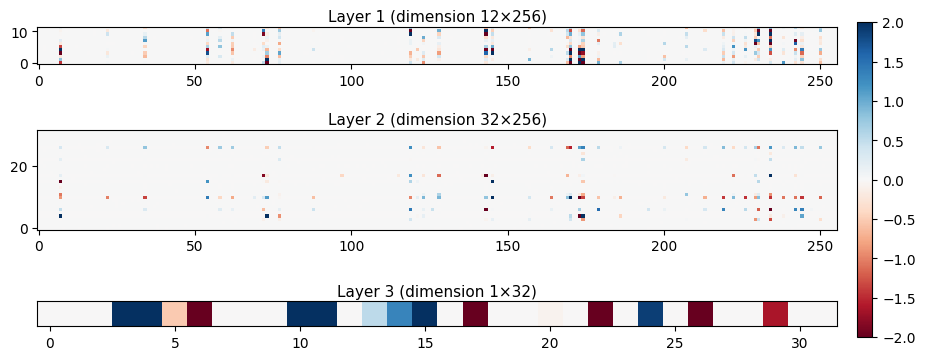


Loading weights from nonoverlappingCNN_sigmoid__fcnn_decreasing_relu.pth...


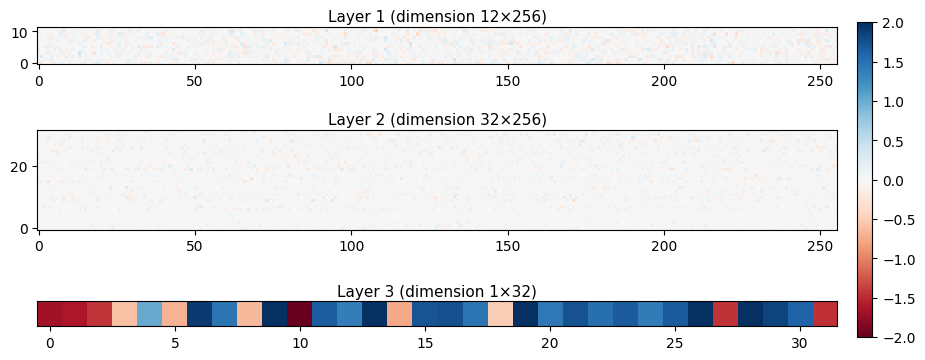


Loading weights from nonoverlappingCNN_sigmoid__fcnn_decreasing_tanh.pth...


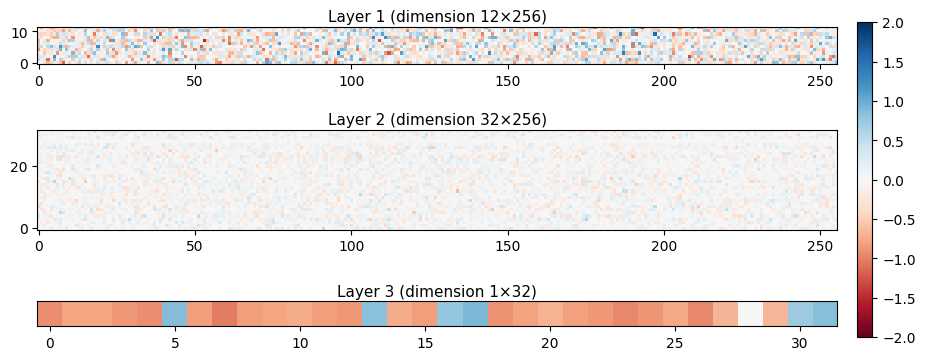


Loading weights from nonoverlappingCNN_tanh__fcnn_decreasing_tanh.pth...


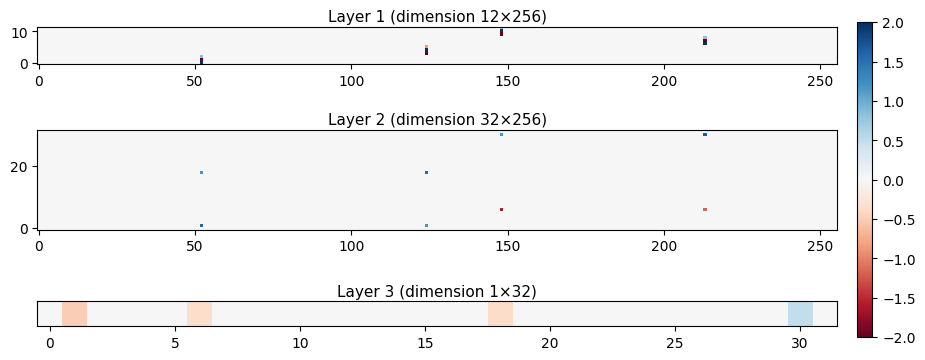


Loading weights from nonoverlappingCNN_tanh__fcnn_decreasing_sigmoid.pth...


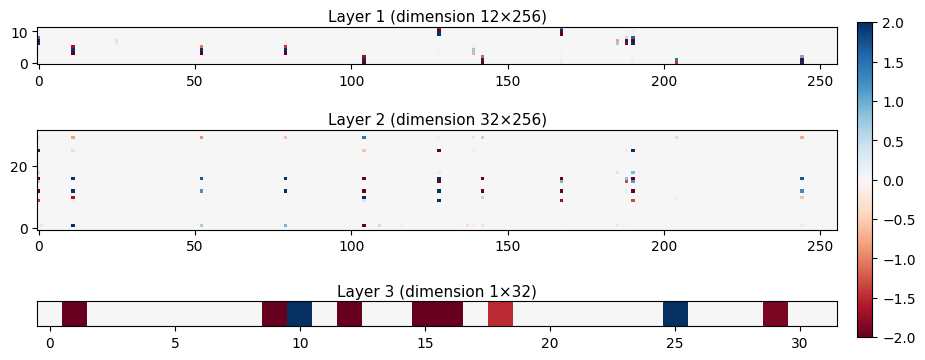


Loading weights from nonoverlappingCNN_relu__fcnn_decreasing_tanh.pth...


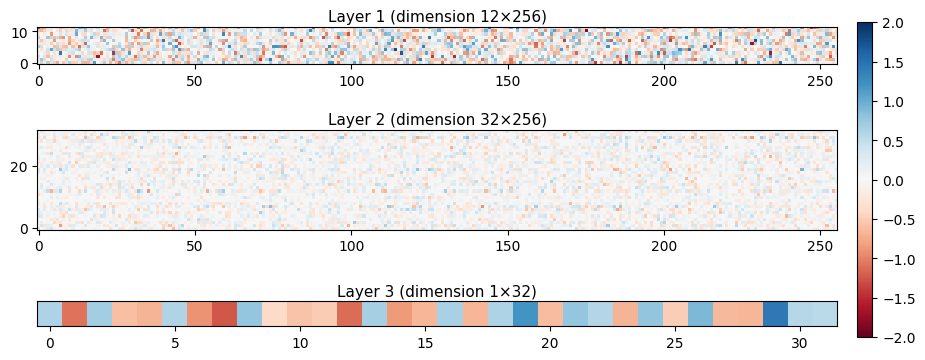


Loading weights from nonoverlappingCNN_relu__fcnn_decreasing_relu.pth...


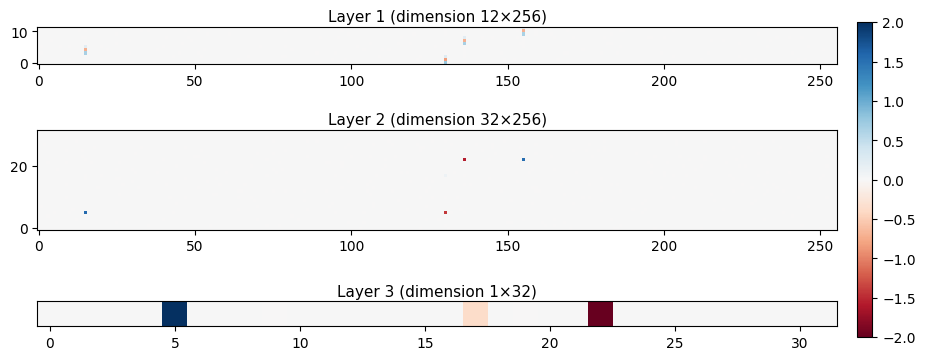


Loading weights from nonoverlappingCNN_sigmoid__fcnn_decreasing_sigmoid.pth...


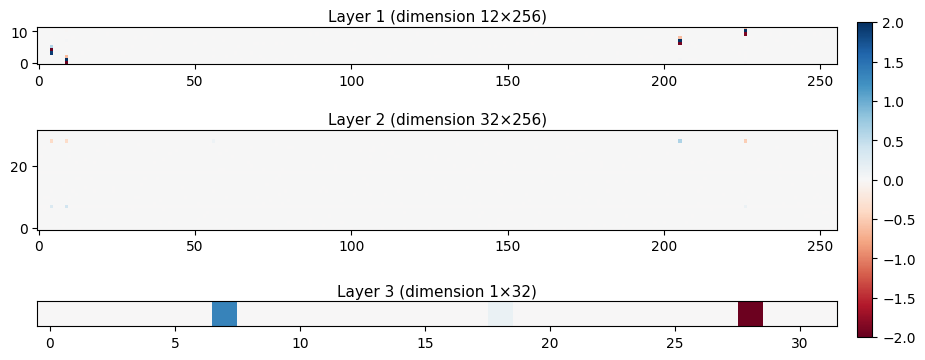


Loading weights from nonoverlappingCNN_tanh__fcnn_decreasing_relu.pth...


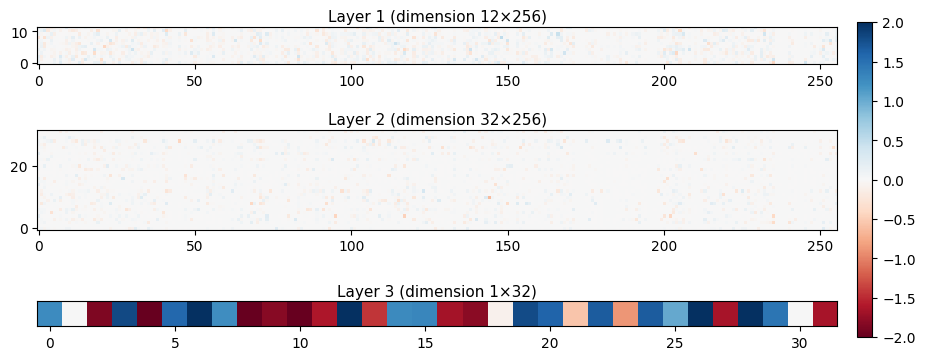

In [184]:
directory = "../experiment_output/experiments_27032025"
create_all_heatmaps(directory)


Loading weights from nonoverlappingCNN_relu__fcnn_decreasing_sigmoid.pth...


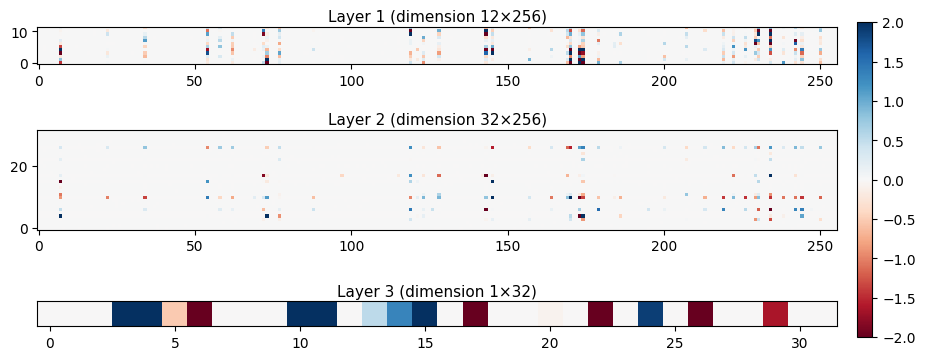


Loading weights from nonoverlappingCNN_tanh__fcnn_decreasing_tanh.pth...


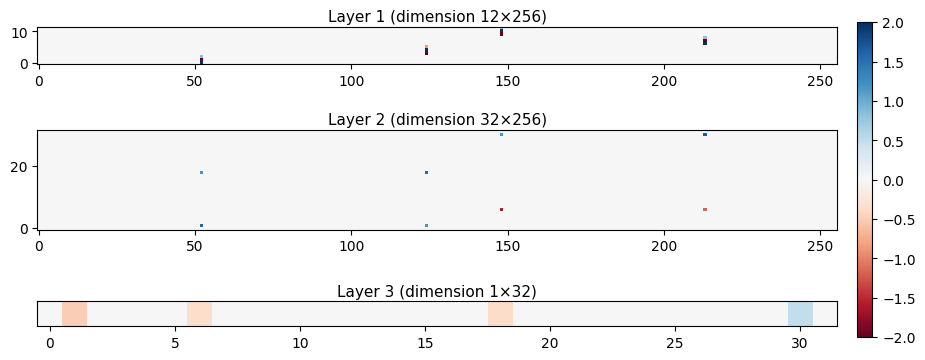


Loading weights from nonoverlappingCNN_relu__fcnn_decreasing_tanh.pth...


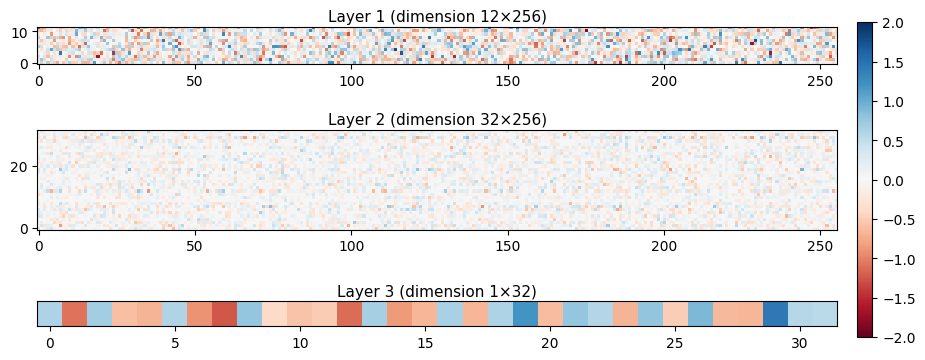


Loading weights from nonoverlappingCNN_relu__fcnn_decreasing_relu.pth...


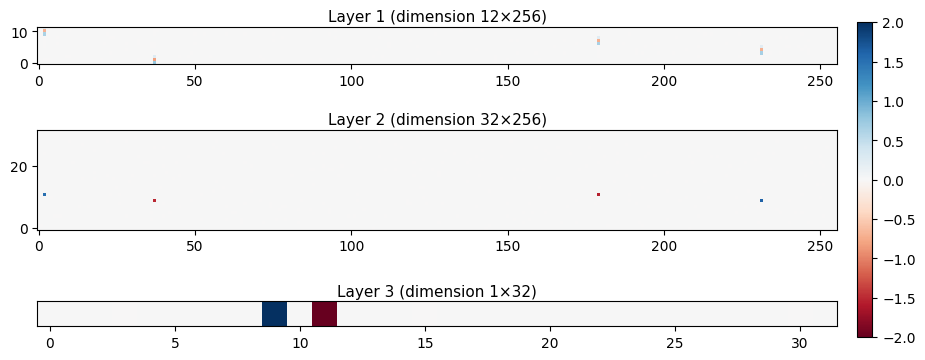


Loading weights from nonoverlappingCNN_tanh__fcnn_decreasing_relu.pth...


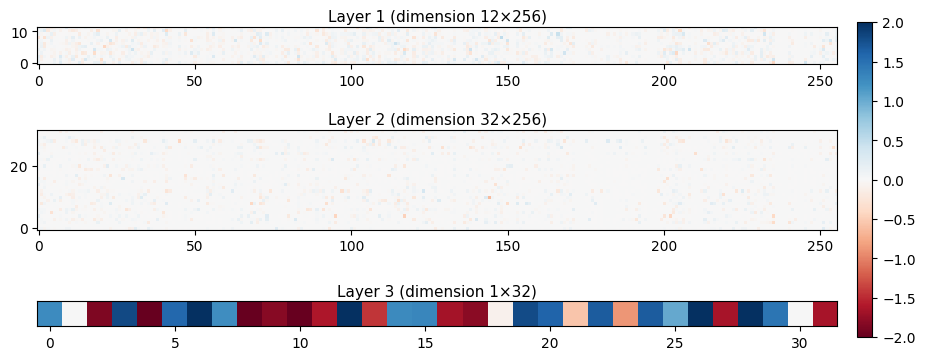

In [186]:
directory = "../experiment_output/experiments_28032025"
create_all_heatmaps(directory)